In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("dataset_mood_smartphone.csv")

In [3]:
df

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.000
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.000
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.000
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.000
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.000
...,...,...,...,...,...
376907,2770399,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032
376908,2772465,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008
376909,2774026,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026
376910,2774133,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033


In [4]:
df.isnull().sum()

Unnamed: 0      0
id              0
time            0
variable        0
value         202
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.dtypes

Unnamed: 0      int64
id             object
time           object
variable       object
value         float64
dtype: object

# Scores

In [7]:
# Filter the dataset for mood, arousal, and valence
mood_data = df[df['variable'] == 'mood']
arousal_data = df[df['variable'] == 'circumplex.arousal']
valence_data = df[df['variable'] == 'circumplex.valence']

# Check the range of values and presence of NaN values for mood, arousal, and valence
mood_range = (mood_data['value'].min(), mood_data['value'].max(), mood_data['value'].isnull().sum(axis = 0))
arousal_range = (arousal_data['value'].min(), arousal_data['value'].max(), arousal_data['value'].isnull().sum(axis = 0))
valence_range = (valence_data['value'].min(), valence_data['value'].max(), valence_data['value'].isnull().sum(axis = 0))

mood_range, arousal_range, valence_range


((1.0, 10.0, 0), (-2.0, 2.0, 46), (-2.0, 2.0, 156))

In [8]:
mood_data

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.0
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.0
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.0
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.0
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.0
...,...,...,...,...,...
5636,5637,AS14.33,2014-05-30 09:00:00.000,mood,8.0
5637,5638,AS14.33,2014-05-30 13:00:00.000,mood,6.0
5638,5639,AS14.33,2014-05-30 19:00:00.000,mood,8.0
5639,5640,AS14.33,2014-05-30 20:00:00.000,mood,6.0


In [9]:
arousal_data

,Unnamed: 0,id,time,variable,value
5641,5642,AS14.01,2014-02-26 13:00:00.000,circumplex.arousal,-1.0
5642,5643,AS14.01,2014-02-26 15:00:00.000,circumplex.arousal,-1.0
5643,5644,AS14.01,2014-02-26 18:00:00.000,circumplex.arousal,0.0
5644,5645,AS14.01,2014-02-26 21:00:00.000,circumplex.arousal,1.0
5645,5646,AS14.01,2014-02-27 09:00:00.000,circumplex.arousal,-2.0
...,...,...,...,...,...
11279,11280,AS14.33,2014-05-30 09:00:00.000,circumplex.arousal,1.0
11280,11281,AS14.33,2014-05-30 13:00:00.000,circumplex.arousal,0.0
11281,11282,AS14.33,2014-05-30 19:00:00.000,circumplex.arousal,-2.0
11282,11283,AS14.33,2014-05-30 20:00:00.000,circumplex.arousal,-2.0


In [10]:
valence_data

,Unnamed: 0,id,time,variable,value
11284,11285,AS14.01,2014-02-26 13:00:00.000,circumplex.valence,0.0
11285,11286,AS14.01,2014-02-26 15:00:00.000,circumplex.valence,1.0
11286,11287,AS14.01,2014-02-26 18:00:00.000,circumplex.valence,1.0
11287,11288,AS14.01,2014-02-26 21:00:00.000,circumplex.valence,1.0
11288,11289,AS14.01,2014-02-27 09:00:00.000,circumplex.valence,0.0
...,...,...,...,...,...
16922,16923,AS14.33,2014-05-30 09:00:00.000,circumplex.valence,1.0
16923,16924,AS14.33,2014-05-30 13:00:00.000,circumplex.valence,0.0
16924,16925,AS14.33,2014-05-30 19:00:00.000,circumplex.valence,-1.0
16925,16926,AS14.33,2014-05-30 20:00:00.000,circumplex.valence,-1.0


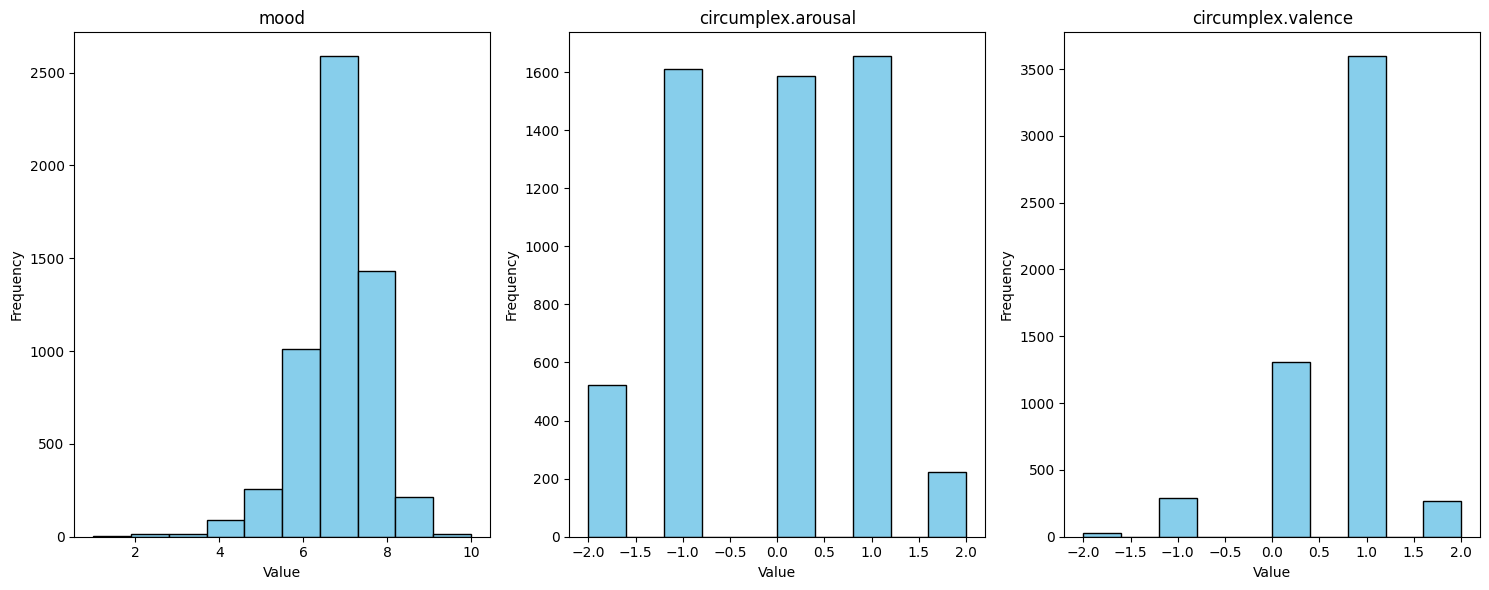

In [11]:
# Preparing the figure to plot histograms for a subset of variables
fig, axs = plt.subplots(1, 3, figsize=(15, 6))
axs = axs.flatten()  # Flatten the array for easy iteration

# Selecting a manageable subset of variables for histograms
scores = ['mood', 'circumplex.arousal', 'circumplex.valence']  # Adjust based on how many you wish to plot

for ax, variable in zip(axs, scores):
    var_df = df[df['variable'] == variable]
    ax.hist(var_df['value'], color='skyblue', edgecolor='black')
    ax.set_title(variable)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## nan values scores

In [12]:
nan_rows_arousal = df[(df['variable'] == 'circumplex.arousal') & (df['value'].isna())].index
nan_rows_valence = df[(df['variable'] == 'circumplex.valence') & (df['value'].isna())].index

# Combine the indices of rows with NaN values for arousal and valence
nan_rows_combined = nan_rows_arousal.union(nan_rows_valence)

In [13]:
nan_rows_combined

Index([ 5708,  5730,  5772,  5796,  5835,  6324,  6378,  6433,  6667,  6792,
       ...
       16802, 16808, 16814, 16851, 16852, 16858, 16861, 16881, 16898, 16902],
      dtype='int64', length=202)

In [14]:
df_nan = df.loc[nan_rows_combined]
df_nan

,Unnamed: 0,id,time,variable,value
5708,5709,AS14.01,2014-04-02 18:00:00.000,circumplex.arousal,NaN
5730,5731,AS14.01,2014-04-07 15:00:00.000,circumplex.arousal,NaN
5772,5773,AS14.01,2014-04-16 12:00:00.000,circumplex.arousal,NaN
5796,5797,AS14.01,2014-04-21 13:00:00.000,circumplex.arousal,NaN
5835,5836,AS14.01,2014-04-29 09:00:00.000,circumplex.arousal,NaN
...,...,...,...,...,...
16858,16859,AS14.33,2014-05-16 20:00:00.000,circumplex.valence,NaN
16861,16862,AS14.33,2014-05-17 12:00:00.000,circumplex.valence,NaN
16881,16882,AS14.33,2014-05-21 16:00:00.000,circumplex.valence,NaN
16898,16899,AS14.33,2014-05-24 23:00:00.000,circumplex.valence,NaN


## negative values in time

In [15]:
# List of variables/categories to check for negative values, excluding mood, arousal, and valence
variables_to_check = [variable for variable in df['variable'].unique() if variable not in ['mood', 'circumplex.arousal', 'circumplex.valence']]

# Check for negative values in the remaining variables
negative_values_check = {variable: (df[df['variable'] == variable]['value'] < 0).any() for variable in variables_to_check}

negative_values_check

# Identify rows with negative values in appCat.builtin and appCat.entertainment in the original dataset
negative_values_builtin = df[(df['variable'] == 'appCat.builtin') & (df['value'] < 0)].index
negative_values_entertainment = df[(df['variable'] == 'appCat.entertainment') & (df['value'] < 0)].index

#neg combined 
neg = negative_values_builtin.union(negative_values_entertainment)
# Combine the indices of rows with negative values for appCat.builtin and appCat.entertainment
# with previously identified NaN rows for removal
remove_combined = nan_rows_combined.union(negative_values_builtin).union(negative_values_entertainment)

df_negative = df.loc[neg]

In [16]:
df_negative

,Unnamed: 0,id,time,variable,value
150040,151512,AS14.02,2014-03-16 15:46:43.769,appCat.builtin,-44.689
159972,622771,AS14.07,2014-04-30 14:18:06.200,appCat.builtin,-82798.871
162154,754571,AS14.12,2014-04-02 16:42:16.523,appCat.builtin,-1.218
309805,484694,AS14.02,2014-03-26 21:18:45.144,appCat.entertainment,-0.011


## nan scores plus neg times

In [17]:
combined = df.loc[remove_combined]

combined

,Unnamed: 0,id,time,variable,value
5708,5709,AS14.01,2014-04-02 18:00:00.000,circumplex.arousal,NaN
5730,5731,AS14.01,2014-04-07 15:00:00.000,circumplex.arousal,NaN
5772,5773,AS14.01,2014-04-16 12:00:00.000,circumplex.arousal,NaN
5796,5797,AS14.01,2014-04-21 13:00:00.000,circumplex.arousal,NaN
5835,5836,AS14.01,2014-04-29 09:00:00.000,circumplex.arousal,NaN
...,...,...,...,...,...
16902,16903,AS14.33,2014-05-25 21:00:00.000,circumplex.valence,NaN
150040,151512,AS14.02,2014-03-16 15:46:43.769,appCat.builtin,-44.689
159972,622771,AS14.07,2014-04-30 14:18:06.200,appCat.builtin,-82798.871
162154,754571,AS14.12,2014-04-02 16:42:16.523,appCat.builtin,-1.218


## separate dfs for each variable to do edas

In [18]:
category_dfs = {variable: df[df['variable'] == variable] for variable in df['variable'].unique()}

In [19]:
#example
activity_df = category_dfs['activity']
activity_df

,Unnamed: 0,id,time,variable,value
16927,16928,AS14.01,2014-03-20 22:00:00.000,activity,0.071429
16928,16929,AS14.01,2014-03-20 23:00:00.000,activity,0.091667
16929,16930,AS14.01,2014-03-21 00:00:00.000,activity,0.008333
16930,16931,AS14.01,2014-03-21 01:00:00.000,activity,0.000000
16931,16932,AS14.01,2014-03-21 02:00:00.000,activity,0.000000
...,...,...,...,...,...
39887,39888,AS14.33,2014-05-30 16:00:00.000,activity,0.250000
39888,39889,AS14.33,2014-05-30 19:00:00.000,activity,0.035714
39889,39890,AS14.33,2014-05-30 20:00:00.000,activity,0.008403
39890,39891,AS14.33,2014-05-30 21:00:00.000,activity,0.017094


In [20]:
screen_df = category_dfs['activity']
screen_df

,Unnamed: 0,id,time,variable,value
16927,16928,AS14.01,2014-03-20 22:00:00.000,activity,0.071429
16928,16929,AS14.01,2014-03-20 23:00:00.000,activity,0.091667
16929,16930,AS14.01,2014-03-21 00:00:00.000,activity,0.008333
16930,16931,AS14.01,2014-03-21 01:00:00.000,activity,0.000000
16931,16932,AS14.01,2014-03-21 02:00:00.000,activity,0.000000
...,...,...,...,...,...
39887,39888,AS14.33,2014-05-30 16:00:00.000,activity,0.250000
39888,39889,AS14.33,2014-05-30 19:00:00.000,activity,0.035714
39889,39890,AS14.33,2014-05-30 20:00:00.000,activity,0.008403
39890,39891,AS14.33,2014-05-30 21:00:00.000,activity,0.017094


# Times

NameError: name 'variables_to_analyze' is not defined

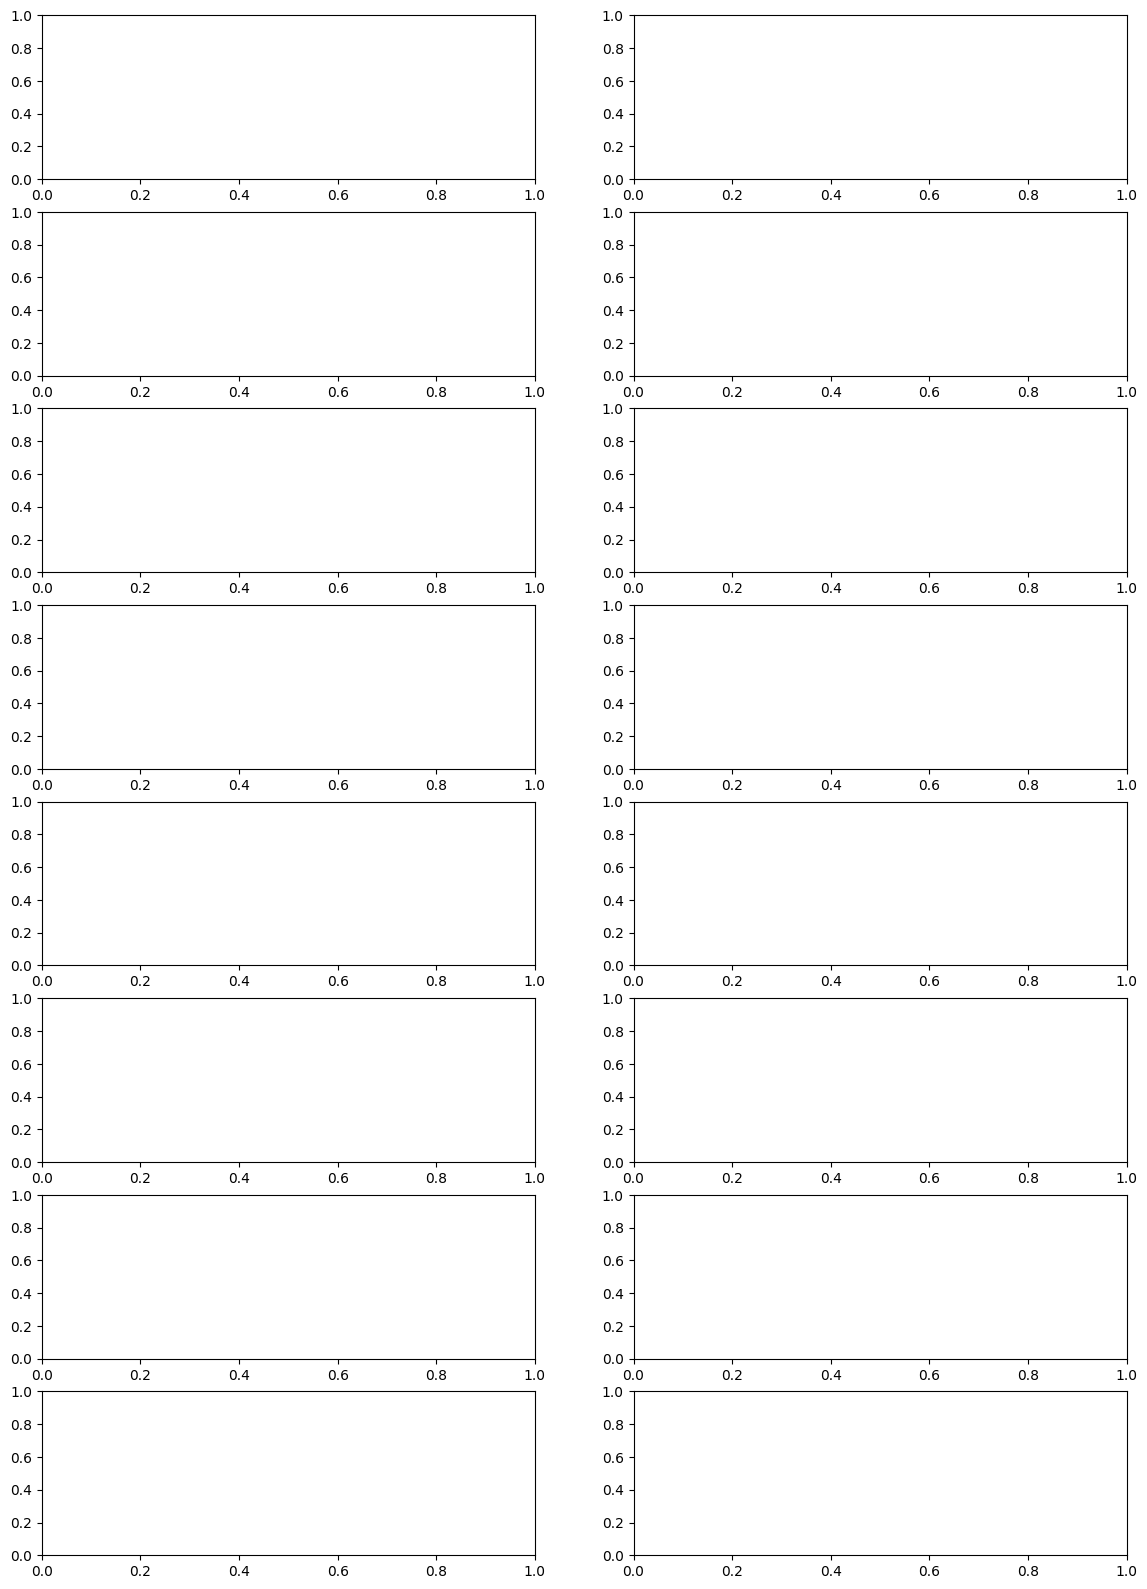

In [21]:
# Preparing the figure to plot histograms for a subset of variables
fig, axs = plt.subplots(8, 2, figsize=(14, 20))
axs = axs.flatten()  # Flatten the array for easy iteration

variables_for_histograms = variables_to_analyze[:16]  # Adjust based on how many you wish to plot

for ax, variable in zip(axs, variables_for_histograms):
    var_df = df[df['variable'] == variable]
    ax.hist(var_df['value'], color='skyblue', edgecolor='black')
    ax.set_title(variable)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Outliers

In [ ]:
# Re-defining the function to calculate outliers for each variable
def calculate_outliers_revised(df, variable):
    # Calculate Q1, Q3, and IQR
    Q1 = df['value'].quantile(0.25)
    Q3 = df['value'].quantile(0.75)
    IQR = Q3 - Q1
    
    # Determine bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = df[(df['value'] < lower_bound) | (df['value'] > upper_bound)]
    return outliers.index.tolist()

# Recalculating outliers for each variable in the original dataset before any removals  # The dataset after removing NaNs and negative values but before removing any outliers
variables_to_analyze_revised = [var for var in df['variable'].unique()]

# Collecting outlier indices for each variable
all_outlier_indices_revised = []
for var in variables_to_analyze_revised:
    all_outlier_indices_revised.extend(calculate_outliers_revised(df[df['variable'] == var], var))

# Removing the outliers from the dataset
df_outliers = df.loc[all_outlier_indices_revised]

In [ ]:
df_outliers

,Unnamed: 0,id,time,variable,value
16,17,AS14.01,2014-03-22 21:00:00.000,mood,5.000
25,26,AS14.01,2014-03-24 18:00:00.000,mood,5.000
41,42,AS14.01,2014-03-28 10:00:00.000,mood,5.000
63,64,AS14.01,2014-04-01 17:00:00.000,mood,5.000
64,65,AS14.01,2014-04-01 21:00:00.000,mood,5.000
...,...,...,...,...,...
376849,2744980,AS14.28,2014-04-13 21:43:12.119,appCat.weather,68.253
376855,2746655,AS14.28,2014-04-18 08:19:03.315,appCat.weather,56.036
376896,2764945,AS14.30,2014-03-23 08:46:30.237,appCat.weather,344.863
376901,2769195,AS14.30,2014-04-06 10:57:54.450,appCat.weather,51.507
